# Mental Health in the Tech Industry
TODO meaningful text
years 2016 - 2019

## Setup

In [38]:
# Setup
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

In [39]:
# Establish connection to db
con = sqlite3.connect('mental_health.sqlite')
cur = con.cursor()

In [40]:
# Transform 'Question' table into dataframe
questions = pd.read_sql_query("SELECT * FROM Question", con)

In [41]:
# Transform 'Answer' table into dataframe
df = pd.read_sql_query("SELECT * FROM Answer WHERE NOT SurveyID=2014", con)

In [42]:
# Change 'SurveyID' column into 'Year'
df.rename(columns={'SurveyID': 'Year'}, inplace = True)

## Question catalog

In [43]:
# Extract valid answers for Q2: "What is your gender?"
q2 = df[(df['QuestionID'] == 2) & (df['AnswerText'] != -1)]

## Characteristics of the participants

### Gender distribution

#### Gender setup

In [44]:
# Change "AnswerText" to "Gender"
q2.rename(columns={'AnswerText': 'Gender'}, inplace = True)

In [45]:
# Capitalize all entries
q2.Gender = q2.Gender.str.capitalize()
q2.head()

,Gender,Year,UserID,QuestionID
1433,Male,2016,1261,2
1434,Male,2016,1262,2
1435,Male,2016,1263,2
1436,Male,2016,1264,2
1437,Female,2016,1265,2


In [46]:
# Change non-"Male" and non-"Female" answer to "Diverse"
q2['Gender'] = np.where(((q2.Gender != 'Male') & (q2.Gender != 'Female')), 'Diverse', q2.Gender)


#### Gender analysis

In [47]:
# Group and count answers by year
q2_by_year = q2.groupby('Year').size().reset_index(name="Count")
print(q2_by_year)

   Year  Count
0  2016   1433
1  2017    756
2  2018    417
3  2019    352


In [48]:
# Group and count answers by gender
q2_by_gender = q2.groupby('Gender').size().reset_index(name="Count")
print(q2_by_gender)

    Gender  Count
0  Diverse    129
1   Female    777
2     Male   2052


In [49]:
# Group and count answers by year & gender
q2_by_gender_and_year = q2.groupby(['Gender', 'Year']).size().reset_index(name="Count")
print(q2_by_gender_and_year)

     Gender  Year  Count
0   Diverse  2016     40
1   Diverse  2017     36
2   Diverse  2018     26
3   Diverse  2019     27
4    Female  2016    336
5    Female  2017    218
6    Female  2018    125
7    Female  2019     98
8      Male  2016   1057
9      Male  2017    502
10     Male  2018    266
11     Male  2019    227


In [50]:
# Calculate total percentage of genders and append to q2_by_gender
genders_total = q2_by_gender.Count.sum()

diverse_total_percentage = q2_by_gender.at[0, 'Count'] / genders_total * 100
female_total_percentage = q2_by_gender.at[1, 'Count'] / genders_total * 100
male_total_percentage = q2_by_gender.at[2, 'Count'] / genders_total * 100

genders_percentage = [diverse_total_percentage, female_total_percentage, male_total_percentage]

q2_by_gender['Percentage'] = genders_percentage

print(q2_by_gender)

    Gender  Count  Percentage
0  Diverse    129    4.361055
1   Female    777   26.267748
2     Male   2052   69.371197


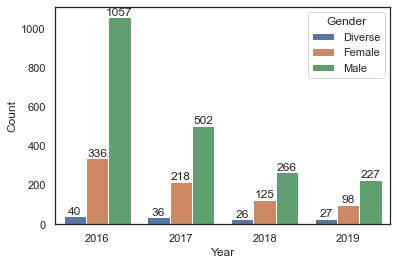

In [58]:
# q2_by_year_and_gender visualized
ax = sns.barplot(x = 'Year', y = 'Count', hue = 'Gender', data = q2_by_gender_and_year)
for container in ax.containers:
    ax.bar_label(container)

### Age distribution

## Hypotheses